<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Package-Imports" data-toc-modified-id="Package-Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Package Imports</a></span></li><li><span><a href="#Organize-Data-from-PhRMA-Report" data-toc-modified-id="Organize-Data-from-PhRMA-Report-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Organize Data from PhRMA Report</a></span></li><li><span><a href="#Collect-FDA-Data" data-toc-modified-id="Collect-FDA-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Collect FDA Data</a></span></li><li><span><a href="#Combine-Data-Sources" data-toc-modified-id="Combine-Data-Sources-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Combine Data Sources</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plot Data</a></span></li><li><span><a href="#Citations" data-toc-modified-id="Citations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Citations</a></span><ul class="toc-item"><li><span><a href="#Data-Sources" data-toc-modified-id="Data-Sources-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data Sources</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

# Eroom's Law

## Introduction

Many are familiar with [Moore's Law](https://en.wikipedia.org/wiki/Moore%27s_law), but few people outside of biotech are familar with Eroom's Law. 

[Eroom's Law](https://en.wikipedia.org/wiki/Eroom%27s_law) formalizes the idea that drug discovery has gotten less efficient as time goes on. The law states that the number of drugs approved per billion dollars spent on R&D will half approximately every 9 years. 

When this problem was originally observed, solutions to the problem were mostly centered around cutting costs in drug development. A quote from a Nature Drug Discovery paper sums up ideas from a few sources,

> _... greater management attention to factors such as project
costs and speed of implementation, by
reorganizing R&D structures into smaller
focused units in some cases or larger units
with superior economies of scale in others,
by outsourcing to lower-cost countries,
by adjusting management metrics and
introducing R&D ‘performance scorecards’, or by somehow making scientists
more ‘entrepreneurial’_ <sup>1</sup>

This type of mindset essentially boils down to reducing spending to improve efficiency. 


---

Since the posting of the quoted article, machine and deep learning have exploded in generalizability and overall effectiveness. In this notebook, I'll explore whether these technologies have had an effect on the trend of Eroom's Law.

In [1]:
plot_df

NameError: name 'plot_df' is not defined

## Package Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import xml.etree.ElementTree as ET
from IPython.display import clear_output
import datetime
import itertools
import re
import lxml.html
from matplotlib.ticker import ScalarFormatter

## Organize Data from PhRMA Report

https://www.phrma.org/report/2019-phrma-annual-membership-survey

The PhRMA organization puts out a yearly report on the biopharmaceutical industry. They include about 40 years of historical data in the report.

In [3]:
pharma_columns = """Year
Domestic_RD
Annual Percentage_Change 
RD_Abroad
Annual_Percentage_Change 
Total_RD
Annual_Percentage_Change"""

pharma_columns = pharma_columns.split('\n')
pharma_columns

['Year',
 'Domestic_RD',
 'Annual Percentage_Change ',
 'RD_Abroad',
 'Annual_Percentage_Change ',
 'Total_RD',
 'Annual_Percentage_Change']

In [4]:
pharma_data = """2022 $75,246.8 -5.5% $25,598.4 12.9% $100,845.2 -1.4%
2021 $79,610.0 9.9% $22,678.4 21.2% $102,288.4 12.2%
2020 $72,412.1 12.5% $18,714.2 0.6% $91,126.3 9.8%
2019 $64,357.0 3.4% $18,599.3 7.0% $82,956.3 4.2%
2018 $62,219.7 11.6% $17,383.1 11.1% $79,602.8 11.5%
2017 $55,755.0 6.4% $15,644.4 19.2% $71,399.4 8.9%
2016 $52,418.2 9.0% $13,120.1 13.8% $65,538.3 9.9%
2015 $48,110.5 18.1% $11,531.9 -7.9% $59,642.4 12.0%
2014 $40,737.3 0.8% $12,515.9 11.6% $53,253.2 3.2%
2013 $40,396.0 7.7% $11,217.6 -7.1% $51,613.6 4.1%
2012 $37,510.2 3.1% $12,077.4 -1.6% $49,587.6 1.9%
2011 $36,373.6 -10.6% $12,271.4 22.4% $48,645.0 -4.1%
2010 $40,688.1 15.1% $10,021.7 -9.6% $50,709.8 9.2%
2009 $35,356.0 -0.6% $11,085.6 -6.1% $46,441.6 -2.0%
2008 $35,571.1 -2.8% $11,812.0 4.6% $47,383.1 -1.1%
2007 $36,608.4 7.8% $11,294.8 25.4% $47,903.1 11.5%
2006 $33,967.9 9.7% $9,005.6 1.3% $42,973.5 7.8%
2005 $30,969.0 4.8% $8,888.9 19.1% $39,857.9 7.7%
2004 $29,555.5 9.2% $7,462.6 1.0% $37,018.1 7.4%
2003 $27,064.9 5.5% $7,388.4 37.9% $34,453.3 11.1%
2002 $25,655.1 9.2% $5,357.2 -13.9% $31,012.2 4.2%
2001 $23,502.0 10.0% $6,220.6 33.3% $29,772.7 14.4%
2000 $21,363.7 15.7% $4,667.1 10.6% $26,030.8 14.7%
1999 $18,471.1 7.4% $4,219.6 9.9% $22,690.7 8.2%
1998 $17,127.9 11.0% $3,839.0 9.9% $20,966.9 10.8%
1997 $15,466.0 13.9% $3,492.1 6.5% $18,958.1 12.4%
1996 $13,627.1 14.8% $3,278.5 -1.6% $16,905.6 11.2%
1995 $11,874.0 7.0% $3,333.5 *** $15,207.4 ***
1994 $11,101.6 6.0% $2,347.8 3.8% $13,449.4 5.6%
1993 $10,477.1 12.5% $2,262.9 5.0% $12,740.0 11.1%
1992 $9,312.1 17.4% $2,155.8 21.3% $11,467.9 18.2%
1991 $7,928.6 16.5% $1,776.8 9.9% $9,705.4 15.3%
1990 $6,802.9 13.0% $1,617.4 23.6% $8,420.3 14.9%
1989 $6,021.4 15.0% $1,308.6 0.4% $7,330.0 12.1%
1988 $5,233.9 16.2% $1,303.6 30.6% $6,537.5 18.8%
1987 $4,504.1 16.2% $998.1 15.4% $5,502.2 16.1%
1986 $3,875.0 14.7% $865.1 23.8% $4,740.1 16.2%
1985 $3,378.7 13.3% $698.9 17.2% $4,077.6 13.9%
1984 $2,982.4 11.6% $596.4 9.2% $3,578.8 11.2%
1983 $2,671.3 17.7% $546.3 8.2% $3,217.6 16.0%
1982 $2,268.7 21.3% $505.0 7.7% $2,773.7 18.6%
1981 $1,870.4 20.7% $469.1 9.7% $2,339.5 18.4%
1980 $1,549.2 16.7% $427.5 42.8% $1,976.7 21.5%"""

pharma_data = re.sub('[\$,]', '', pharma_data)

In [5]:
### Split by newline character to separate years
pharma_data_list = pharma_data.split('\n')
### Split each year's list into columns using space as the delimiter
pharma_data_df_list = [i.split(' ') for i in pharma_data_list]

r_d_by_year = pd.DataFrame(pharma_data_df_list, columns=pharma_columns)
r_d_by_year = r_d_by_year.set_index('Year')
r_d_by_year.head()

,Domestic_RD,Annual Percentage_Change,RD_Abroad,Annual_Percentage_Change,Total_RD,Annual_Percentage_Change
Year,,,,,,
2022,75246.8,-5.5%,25598.4,12.9%,100845.2,-1.4%
2021,79610.0,9.9%,22678.4,21.2%,102288.4,12.2%
2020,72412.1,12.5%,18714.2,0.6%,91126.3,9.8%
2019,64357.0,3.4%,18599.3,7.0%,82956.3,4.2%
2018,62219.7,11.6%,17383.1,11.1%,79602.8,11.5%


## Collect FDA Data

Below, I'll scrape the FDA's website for drugs approved in each year in the range of interest.

In [6]:
### Create list of months
months = []
for i in range(1,13):
    months.append(datetime.date(2008, i, 1).strftime('%m'))
months

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [7]:
### Create list of years
years = [str(i) for i in range(1980, 2023)]
print(years[:5], ' . . . ', years[-5:])

### Itertools.product essentially cross joins the lists, 
### giving all possibile combinations of the lists' members
months_years = itertools.product(months, years)

['1980', '1981', '1982', '1983', '1984']  . . .  ['2018', '2019', '2020', '2021', '2022']


The FDA Database's URL has two parameters we'll manipulate. Users can supply a month and year to the URL to retrieve a table of drugs approved in that month. An example URL is below.

https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearch.process&rptName=0&reportSelectMonth=02&reportSelectYear=1980&nav#navigation

In [8]:
cell_list = []

### Each loop will plug a different month, year combination into the FDA's URL
for month, year in months_years:
    
    row_list = []
    
    # print("Month : ", month, " // year : ", year)
    url = """https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearch.process&rptName=0&reportSelectMonth={month}&reportSelectYear={year}&nav#navigation""".format(month=month, year=year)
    print(url)
    content = requests.get(url).text
    tree = lxml.html.fromstring(content)
    
    ### Each element in this list will an HTMLelement from the selected drug approval table
    row_list = tree.xpath('//table[@id="example_1"]/tbody/tr')

    for element in row_list:
        ### Each element in this list will be a row from a table, not necessarily the selected one
        cell_list.append([cell.text if index != 1 else cell.find('a').get('title') for index, cell in enumerate(element.xpath('td'))])

fda_columns = ['Approval Date', 'Drug Name', 'Submission', 'Active Ingredients', 'Company', 'Submission Classification', 'Submission Status']
fda_data = pd.DataFrame(cell_list, columns = fda_columns)
fda_data.head()

https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearch.process&rptName=0&reportSelectMonth=01&reportSelectYear=1980&nav#navigation
https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearch.process&rptName=0&reportSelectMonth=01&reportSelectYear=1981&nav#navigation
https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearch.process&rptName=0&reportSelectMonth=01&reportSelectYear=1982&nav#navigation
https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearch.process&rptName=0&reportSelectMonth=01&reportSelectYear=1983&nav#navigation
https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearch.process&rptName=0&reportSelectMonth=01&reportSelectYear=1984&nav#navigation
https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearch.process&rptName=0&reportSelectMonth=01&reportSelectYear=1985&nav#navigation
https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearc

,Approval Date,Drug Name,Submission,Active Ingredients,Company,Submission Classification,Submission Status
0,01/02/1980,Click to view PHOSPHOLINE IODIDE (ECHOTHIOPHAT...,SUPPL-16,ECHOTHIOPHATE IODIDE,FERA PHARMS LLC,Manufacturing (CMC),Approval
1,01/02/1980,Click to view FLAGYL (METRONIDAZOLE),SUPPL-25,METRONIDAZOLE,PFIZER,Manufacturing (CMC),Approval
2,01/02/1980,Click to view INTRALIPID 10% (SOYBEAN OIL),SUPPL-19,SOYBEAN OIL,FRESENIUS,Manufacturing (CMC),Approval
3,01/02/1980,Click to view TIMOPTIC (TIMOLOL MALEATE),SUPPL-2,TIMOLOL MALEATE,BAUSCH AND LOMB INC,Labeling,Approval
4,01/03/1980,Click to view RESERPINE (RESERPINE),SUPPL-7,RESERPINE,EVERYLIFE,Labeling,Approval


In [9]:
### Create a year variable for grouping later
fda_data['year'] = [i[6:] for i in fda_data['Approval Date']]
### Create a month_year variable for grouping
### Not used for later analysis
# fda_data['month_year'] = [i[0:2] + '-' + i[6:] for i in fda_data['Approval Date']]

fda_data['Drug Name'] = [re.sub('Click to view ', '', i) for i in fda_data['Drug Name']]

### Create a unique ID for each drug approved
fda_data['unique'] = fda_data['Approval Date'] + '_' + fda_data['Drug Name'] + '_' + fda_data['Company']

### Group the drugs but year, counting the number per year
drugs_by_year = fda_data.groupby('year').agg('count')['unique']
fda_data

,Approval Date,Drug Name,Submission,Active Ingredients,Company,Submission Classification,Submission Status,year,unique
0,01/02/1980,PHOSPHOLINE IODIDE (ECHOTHIOPHATE IODIDE),SUPPL-16,ECHOTHIOPHATE IODIDE,FERA PHARMS LLC,Manufacturing (CMC),Approval,1980,01/02/1980_PHOSPHOLINE IODIDE (ECHOTHIOPHATE I...
1,01/02/1980,FLAGYL (METRONIDAZOLE),SUPPL-25,METRONIDAZOLE,PFIZER,Manufacturing (CMC),Approval,1980,01/02/1980_FLAGYL (METRONIDAZOLE)_PFIZER
2,01/02/1980,INTRALIPID 10% (SOYBEAN OIL),SUPPL-19,SOYBEAN OIL,FRESENIUS,Manufacturing (CMC),Approval,1980,01/02/1980_INTRALIPID 10% (SOYBEAN OIL)_FRESENIUS
3,01/02/1980,TIMOPTIC (TIMOLOL MALEATE),SUPPL-2,TIMOLOL MALEATE,BAUSCH AND LOMB INC,Labeling,Approval,1980,01/02/1980_TIMOPTIC (TIMOLOL MALEATE)_BAUSCH A...
4,01/03/1980,RESERPINE (RESERPINE),SUPPL-7,RESERPINE,EVERYLIFE,Labeling,Approval,1980,01/03/1980_RESERPINE (RESERPINE)_EVERYLIFE
...,...,...,...,...,...,...,...,...,...
182705,12/29/2022,QINLOCK (RIPRETINIB),SUPPL-4,RIPRETINIB,DECIPHERA PHARMS,Labeling,Approval,2022,12/29/2022_QINLOCK (RIPRETINIB)_DECIPHERA PHARMS
182706,12/29/2022,ORMALVI (DICHLORPHENAMIDE),ORIG-1,DICHLORPHENAMIDE,TORRENT,None,Approval,2022,12/29/2022_ORMALVI (DICHLORPHENAMIDE)_TORRENT
182707,12/30/2022,POTASSIUM CHLORIDE (POTASSIUM CHLORIDE),ORIG-1,POTASSIUM CHLORIDE,ANDA REPOSITORY,None,Approval,2022,12/30/2022_POTASSIUM CHLORIDE (POTASSIUM CHLOR...
182708,12/30/2022,AZACITIDINE (AZACITIDINE),ORIG-1,AZACITIDINE,EUGIA PHARMA,None,Approval,2022,12/30/2022_AZACITIDINE (AZACITIDINE)_EUGIA PHARMA


## Combine Data Sources

In [10]:
### Create the plot DataFrame by combining PhRMA and FDA data
plot_df = pd.concat([r_d_by_year, drugs_by_year], axis=1, sort=True)
### Clean up the final DataFrame
plot_df = plot_df.reset_index()
plot_df = plot_df.rename({'unique':'number_of_drugs_approved', 'index' : 'year'},axis=1)
plot_df = plot_df.loc[:, ['year', 'Domestic_RD', 'number_of_drugs_approved']]

### Calulate the number of drugs approved per billion dollars spent on R&D
plot_df['drugs_per_bill'] = plot_df['Domestic_RD'].astype(float) / plot_df['number_of_drugs_approved'].astype(float) 

### Calculate a 5 year moving average of the metric
plot_df['drugs_per_bill_MA'] = plot_df['drugs_per_bill'].rolling(window=5).mean()

plot_df

,year,Domestic_RD,number_of_drugs_approved,drugs_per_bill,drugs_per_bill_MA
0,1980,1549.2,2907,0.532921,NaN
1,1981,1870.4,3053,0.612643,NaN
2,1982,2268.7,3796,0.597655,NaN
3,1983,2671.3,2761,0.967512,NaN
4,1984,2982.4,3550,0.840113,0.710169
5,1985,3378.7,4808,0.702725,0.744130
6,1986,3875.0,4166,0.930149,0.807631
7,1987,4504.1,3960,1.137399,0.915579
8,1988,5233.9,5096,1.027060,0.927489
9,1989,6021.4,4525,1.330696,1.025606


## Plot Data

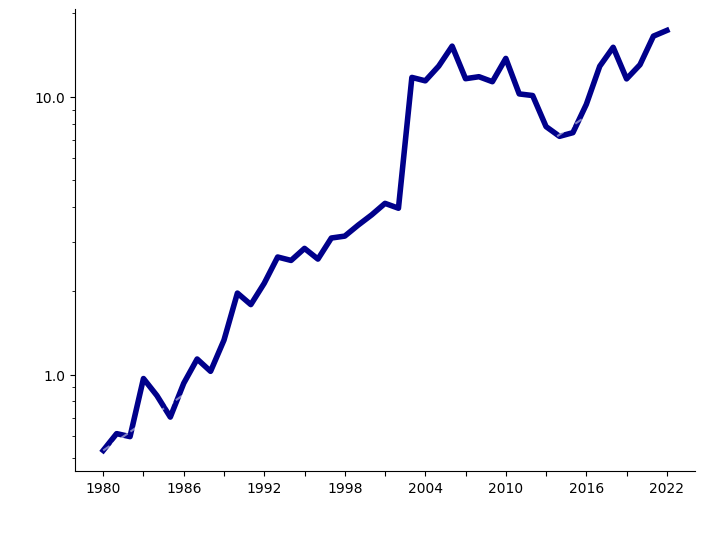

In [17]:
import seaborn as sns

plt.figure(figsize=(8, 6))

### Lines on the plot
fig = sns.lineplot(x="year", y='drugs_per_bill', data=plot_df, linewidth=4, color="#FFFFFF")
# fig = sns.lineplot(x="year", y='drugs_per_bill_MA', data=plot_df, linewidth=2, 
#                    alpha=1, linestyle='--', color='#00008B',
#                    label="Drugs Approved per Year (trailing average)")

### Trend line with a 9 year halflife
### x is an index the same length as the data
x = np.array(range(len(plot_df)))
### y_0 is the initial value from the data
y_0 = plot_df.loc[0, 'drugs_per_bill']
y = y_0*np.exp(0.0770163534*x)
fig.plot(x,y, linestyle='--', alpha=.5, color="#FFFFFF", label="Eroom's Law Trend")

### Show every 3rd y-tick mark
yticks = fig.xaxis.get_major_ticks()
for i in yticks:
    i.set_visible(False)
for i in yticks[::3]:
    i.set_visible(True)

    
    
# ### Add horizontal bars for specific relevant events
# first_bar_label = """In 2000, the first paper on
# DL was published."""
# fig.text(19.8, 1.5, first_bar_label, fontsize=10, horizontalalignment='right')

# second_bar_label = """In 2005, researchers began using
# molecular structure instead of
# 'predefined molecular descriptors' as
# features in drug discovery DL."""
# fig.text(25.3, 1.2, second_bar_label, fontsize=10, horizontalalignment='left')

axes = plt.gca()
#axes.set_ylim([0,2])
 
# fig.vlines('2000', -.2, 2, colors='#5729ce')
# fig.vlines('2005', -.2, 2, colors='#5729ce')

[l.set_visible(False) for (i,l) in enumerate(fig.xaxis.get_ticklabels()) if i % 6 != 0]

### Log scale the Y-axis then remove scientific notation
fig.set_yscale('log')
sf = ScalarFormatter()
sf.set_scientific(False)
axes.yaxis.set_major_formatter(sf)

### Remove plot frame
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
# fig.grid(which='major', axis='x', linestyle='--', linewidth=.3)

### Labels
plt.xlabel("Year", fontsize=14, labelpad=15,color="#FFFFFF")
plt.ylabel("log(cost per drug $B)", fontsize=14,color="#FFFFFF")
# plt.title("Efficiency of Drug Discovery", fontsize=30, fontweight='bold', pad=15, loc='center') # You can comment this line out if you don't need title

# fig.legend(loc='upper left', fontsize=12, frameon=False)
plt.savefig('temp.png', transparent=True)
plt.show(fig)

In [57]:
y_0*np.exp(-0.0770163534*np.array())

array([1.87645236, 1.73735979, 1.6085775 , 1.48934123, 1.37894338,
       1.27672881, 1.18209092, 1.09446809, 1.01334032, 0.93822618,
       0.8686799 , 0.80428875, 0.74467061, 0.68947169, 0.6383644 ,
       0.59104546, 0.54723404, 0.50667016, 0.46911309, 0.43433995,
       0.40214437, 0.37233531, 0.34473585, 0.3191822 , 0.29552273,
       0.27361702, 0.25333508, 0.23455655, 0.21716997, 0.20107219,
       0.18616765, 0.17236792, 0.1595911 , 0.14776136, 0.13680851,
       0.12666754, 0.11727827, 0.10858499, 0.10053609, 0.09308383,
       0.08618396, 0.07979555, 0.07388068])

In [69]:
1/(y_0*np.exp(-0.0770163534*np.array(range(43+28+50))))

array([5.32920537e-01, 5.75586016e-01, 6.21667282e-01, 6.71437802e-01,
       7.25192937e-01, 7.83251694e-01, 8.45958620e-01, 9.13685847e-01,
       9.86835297e-01, 1.06584107e+00, 1.15117203e+00, 1.24333456e+00,
       1.34287560e+00, 1.45038587e+00, 1.56650339e+00, 1.69191724e+00,
       1.82737169e+00, 1.97367059e+00, 2.13168215e+00, 2.30234406e+00,
       2.48666913e+00, 2.68575121e+00, 2.90077175e+00, 3.13300678e+00,
       3.38383448e+00, 3.65474339e+00, 3.94734119e+00, 4.26336429e+00,
       4.60468813e+00, 4.97333825e+00, 5.37150242e+00, 5.80154350e+00,
       6.26601356e+00, 6.76766896e+00, 7.30948678e+00, 7.89468238e+00,
       8.52672859e+00, 9.20937625e+00, 9.94667651e+00, 1.07430048e+01,
       1.16030870e+01, 1.25320271e+01, 1.35353379e+01, 1.46189736e+01,
       1.57893648e+01, 1.70534572e+01, 1.84187525e+01, 1.98933530e+01,
       2.14860097e+01, 2.32061740e+01, 2.50640542e+01, 2.70706759e+01,
       2.92379471e+01, 3.15787295e+01, 3.41069144e+01, 3.68375050e+01,
      

While the first paper didn't have an immediate affect on the drug discovery ecosystem; in the decade following, the decline in productivity appears to be much less stable than it had been previously. 

Its a too soon and this notebook is too light on data to officially declare a break in a trend like Eroom's Law, but it is interesting to speculate about the effect ML/DL had on drug discovery.

In the late 2000's and early 2010's, when people speculated about what advances in drug discovery would look like in the coming decade, they assumed it would primarily involve increasing operational efficiency <sup>1</sup>. Very few people anticipated the effect of new technologies like ML/DL on drug discovery. 

Increasing efficency is typically beneficial in business but decreasing the denomenator (reducing costs) of this productivity metric is only half of the battle. Increasing the numerator (# of drugs produced/approved) is another option in disrupting this trend that may both prove more efficient for pharma companies and provide the general population with more drugs for more conditions. 

## Citations

### Data Sources

- [PhRMA Data](https://www.phrma.org/report/2019-phrma-annual-membership-survey)
    - Yearly report of biopharmaceutical industry showing amount of R&D spending and sales.

- [FDA Drug Approval Data](https://www.accessdata.fda.gov/scripts/cder/daf/index.cfm?event=reportsSearch.process&rptName=0&reportSelectMonth=02&reportSelectYear=1980&nav#navigation)
    - Table of drugs approved in a specific month.



### References
1. https://blogs.sciencemag.org/pipeline/archives/2012/03/08/erooms_law



2. Hongming Chen, Ola Engkvist, Yinhai Wang, Marcus Olivecrona, Thomas Blaschke,
    The rise of deep learning in drug discovery,
    Drug Discovery Today,
    Volume 23, Issue 6,
    2018,
    Pages 1241-1250,
    ISSN 1359-6446,
    https://doi.org/10.1016/j.drudis.2018.01.039.
    (http://www.sciencedirect.com/science/article/pii/S1359644617303598)


3. https://en.wikipedia.org/wiki/Moore%27s_law


4. https://en.wikipedia.org/wiki/Eroom%27s_law


5. http://wavefunction.fieldofscience.com/2012/03/unstoppable-moore-hits-immovable-eroom.html


6. APA 5th Edition: Journal article
    (Scannell, Blanckley, Boldon, & Warrington, 2012, p. ) 
    Scannell, J. W., Blanckley, A., Boldon, H., & Warrington, B. (2012). Diagnosing the decline in pharmaceutical R&amp;D efficiency. Nature Reviews Drug Discovery 64(2), p. 10-12.